In [79]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from tld import get_tld, is_tld

In [80]:
# Reading data

In [81]:
data = pd.read_csv('data1.csv')
data.head()

,Serial no.,URL,Label
0,1,homepages.primex.co.uk/~lesleyah/gbstern.htm,0
1,2,http://attonlinemanagementpage.weebly.com/,1
2,3,http://uyipertx.tk/53l0ck0p/view/login.php?cmd...,1
3,4,https://amaznon.co.jp.rfiwen.cn/,1
4,5,https://cv89429.tmweb.ru/CA.1v3/PARTICULIERS/,1


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93752 entries, 0 to 93751
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Serial no.  93752 non-null  int64 
 1   URL         93752 non-null  object
 2   Label       93752 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


In [83]:
# Checking for null values

In [84]:
data.isnull().sum()

Serial no.    0
URL           0
Label         0
dtype: int64

In [85]:
# Count Different Labels 

In [86]:
count = data.Label.value_counts()
count

0    54864
1    38888
Name: Label, dtype: int64

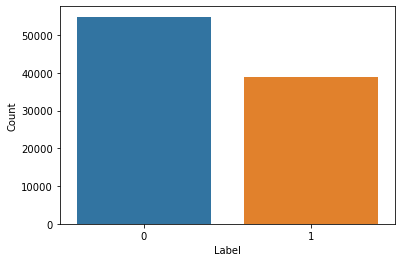

In [87]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Label')
plt.ylabel('Count');

In [88]:
# Remove www. in url

In [89]:
data['URL'] = data['URL'].replace('www.', '', regex=True)
data

,Serial no.,URL,Label
0,1,homepages.primex.co.uk/~lesleyah/gbstern.htm,0
1,2,http://attonlinemanagementpage.weebly.com/,1
2,3,http://uyipertx.tk/53l0ck0p/view/login.php?cmd...,1
3,4,https://amaznon.co.jp.rfiwen.cn/,1
4,5,https://cv89429.tmweb.ru/CA.1v3/PARTICULIERS/,1
...,...,...,...
93747,93748,https://ing-girokonto.sudanltd.com/ing/d6988c9...,1
93748,93749,current-movie-reviews.com/34094/previews/2011/...,0
93749,93750,http://torcache.net/torrent/913EF0F8FBC9D864A6...,0
93750,93751,http://hhathomeassistance.com/survey/updates,1


In [90]:
data.head()

,Serial no.,URL,Label
0,1,homepages.primex.co.uk/~lesleyah/gbstern.htm,0
1,2,http://attonlinemanagementpage.weebly.com/,1
2,3,http://uyipertx.tk/53l0ck0p/view/login.php?cmd...,1
3,4,https://amaznon.co.jp.rfiwen.cn/,1
4,5,https://cv89429.tmweb.ru/CA.1v3/PARTICULIERS/,1


In [ ]:
# Categorizing the URLs as Trusted or Phished

In [91]:
rem = {"Category": {0: "Trusted", 1: "Phishing"}}
data['Category'] = data['Label']
data = data.replace(rem)

In [92]:
# counting the length of the URL

In [93]:
data['url_len'] = data['URL'].apply(lambda x: len(str(x)))

In [94]:
# getting the domain from the URL

In [95]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [96]:
data['domain'] = data['URL'].apply(lambda i: process_tld(i))

In [97]:
data.head()

,Serial no.,URL,Label,Category,url_len,domain
0,1,homepages.primex.co.uk/~lesleyah/gbstern.htm,0,Trusted,44,homepages.primex.co.uk
1,2,http://attonlinemanagementpage.weebly.com/,1,Phishing,42,attonlinemanagementpage.weebly.com
2,3,http://uyipertx.tk/53l0ck0p/view/login.php?cmd...,1,Phishing,200,uyipertx.tk
3,4,https://amaznon.co.jp.rfiwen.cn/,1,Phishing,32,amaznon.co.jp.rfiwen.cn
4,5,https://cv89429.tmweb.ru/CA.1v3/PARTICULIERS/,1,Phishing,45,cv89429.tmweb.ru


In [98]:
#  Independent variables (extracting the features)

In [99]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//','.com','.org','.ru','.in']
for a in feature:
    data[a] = data['URL'].apply(lambda i: i.count(a))

In [100]:
data.head()

,Serial no.,URL,Label,Category,url_len,domain,@,?,-,=,...,+,$,!,*,",",//,.com,.org,.ru,.in
0,1,homepages.primex.co.uk/~lesleyah/gbstern.htm,0,Trusted,44,homepages.primex.co.uk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,http://attonlinemanagementpage.weebly.com/,1,Phishing,42,attonlinemanagementpage.weebly.com,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,http://uyipertx.tk/53l0ck0p/view/login.php?cmd...,1,Phishing,200,uyipertx.tk,0,1,0,3,...,0,0,0,0,0,1,0,0,0,0
3,4,https://amaznon.co.jp.rfiwen.cn/,1,Phishing,32,amaznon.co.jp.rfiwen.cn,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,https://cv89429.tmweb.ru/CA.1v3/PARTICULIERS/,1,Phishing,45,cv89429.tmweb.ru,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [101]:
# Creating a csv file with the output

In [102]:
data.to_csv('Result.csv')

In [ ]:
# Differentiating normal and abnormal URLs

In [103]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [104]:
data['abnormal_url'] = data['URL'].apply(lambda i: abnormal_url(i))

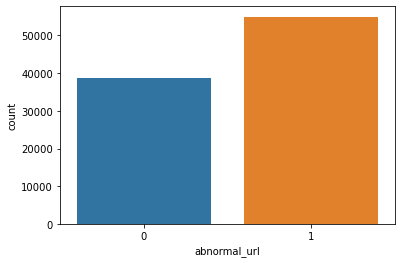

In [105]:
sns.countplot(x='abnormal_url', data=data);

In [ ]:
# Differentiating secure and unsecure https

In [106]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1  #secure
    else:
        # print 'No matching pattern found'
        return 0  #unsecure

In [107]:
data['https'] = data['URL'].apply(lambda i: httpSecure(i))

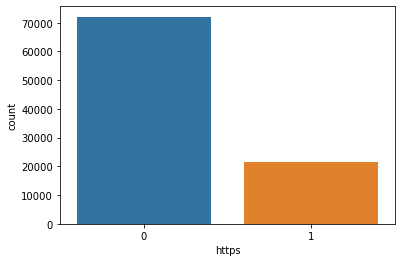

In [108]:
sns.countplot(x='https', data=data);

In [109]:
data.head()

,Serial no.,URL,Label,Category,url_len,domain,@,?,-,=,...,!,*,",",//,.com,.org,.ru,.in,abnormal_url,https
0,1,homepages.primex.co.uk/~lesleyah/gbstern.htm,0,Trusted,44,homepages.primex.co.uk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,http://attonlinemanagementpage.weebly.com/,1,Phishing,42,attonlinemanagementpage.weebly.com,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,http://uyipertx.tk/53l0ck0p/view/login.php?cmd...,1,Phishing,200,uyipertx.tk,0,1,0,3,...,0,0,0,1,0,0,0,0,1,0
3,4,https://amaznon.co.jp.rfiwen.cn/,1,Phishing,32,amaznon.co.jp.rfiwen.cn,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,5,https://cv89429.tmweb.ru/CA.1v3/PARTICULIERS/,1,Phishing,45,cv89429.tmweb.ru,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1


In [ ]:
# training the ML models

In [110]:
X = data.drop(['URL','Label','Category','domain'],axis=1)
y = data['Category']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [112]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:
# all are supervisied ML models

In [113]:
models = [DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression,MLPClassifier]
accuracy_test=[]
for m in models:
    print('Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  93.61%  
###################- End -###################
Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  94.85%  
###################- End -###################
Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  59.38%  
###################- End -###################
Model => <class 'sklearn.linear_model._logistic.LogisticRegression'> 
Test Accuracy :  90.28%  
###################- End -###################
Model => <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 
Test Accuracy :  86.51%  
###################- End -###################


In [114]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier','KNeighbors Classifier','Logistic Regression','MLPClassifier'],
                      "Accuracy":accuracy_test})

In [115]:
output

,Model,Accuracy
0,Decision Tree Classifier,0.936065
1,Random Forest Classifier,0.948481
2,KNeighbors Classifier,0.593779
3,Logistic Regression,0.902786
4,MLPClassifier,0.865091


In [116]:
best_accuracy = output.loc[output['Accuracy'].idxmax()]
best_accuracy

Model       Random Forest Classifier
Accuracy                    0.948481
Name: 1, dtype: object

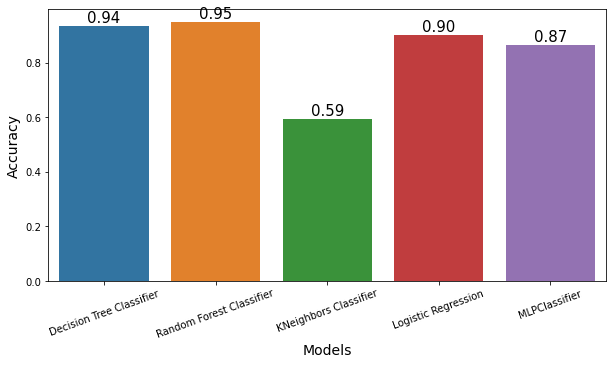

In [117]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()